In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [85]:
df=pd.read_csv('train_AV3 tec.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [86]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [87]:
df.bfill(axis = 0,inplace=True) 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [88]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [89]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
df1=df.apply(LabelEncoder().fit_transform)

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [91]:
scaler.fit(df1.drop('Loan_Status',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [92]:
scaled_features = scaler.transform(df1.drop('Loan_Status',axis=1))
scaled_features

array([[ 0.47491989, -1.36228263, -0.75217674, ...,  0.29977577,
         0.43315227,  1.22329839],
       [ 0.47491989,  0.73406207,  0.23676655, ...,  0.29977577,
         0.43315227, -1.31851281],
       [ 0.47491989,  0.73406207, -0.75217674, ...,  0.29977577,
         0.43315227,  1.22329839],
       ...,
       [ 0.47491989,  0.73406207,  0.23676655, ...,  0.29977577,
         0.43315227,  1.22329839],
       [ 0.47491989,  0.73406207,  1.22570985, ...,  0.29977577,
         0.43315227,  1.22329839],
       [-2.10561827, -1.36228263, -0.75217674, ...,  0.29977577,
        -2.30865695, -0.04760721]])

In [93]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.474920,-1.362283,-0.752177,-0.528362,-0.403582,0.898633,-0.852357,-0.133268,0.299776,0.433152,1.223298
1,0.474920,0.734062,0.236767,-0.528362,-0.403582,0.410559,-0.204048,-0.133268,0.299776,0.433152,-1.318513
2,0.474920,0.734062,-0.752177,-0.528362,2.477808,-0.753846,-0.852357,-1.335961,0.299776,0.433152,1.223298
3,0.474920,0.734062,-0.752177,1.892641,-0.403582,-1.095498,0.876466,-0.308205,0.299776,0.433152,1.223298
4,0.474920,-1.362283,-0.752177,-0.528362,-0.403582,0.933495,-0.852357,0.151004,0.299776,0.433152,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.105618,-1.362283,-0.752177,-0.528362,-0.403582,-0.851461,-0.852357,-1.270359,0.299776,0.433152,-1.318513
610,0.474920,0.734062,2.214653,-0.528362,-0.403582,0.194412,-0.852357,-1.751436,-2.407023,0.433152,-1.318513
611,0.474920,0.734062,0.236767,-0.528362,-0.403582,1.282119,-0.819941,1.637969,0.299776,0.433152,1.223298
612,0.474920,0.734062,1.225710,-0.528362,-0.403582,1.219367,-0.852357,0.981955,0.299776,0.433152,1.223298


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Loan_Status'],test_size=0.20,random_state= 1)

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
knn = KNeighborsClassifier(n_neighbors=1)

In [97]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [98]:
pred = knn.predict(X_test)
pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y'], dtype=object)

In [99]:
knn.score(X_test,y_test)

0.7479674796747967

In [100]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [101]:
print(confusion_matrix(y_test,pred))

[[14 19]
 [12 78]]


In [102]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['Loan_Status'],cv=10)
    accuracy_rate.append(score.mean())

In [103]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['Loan_Status'],cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

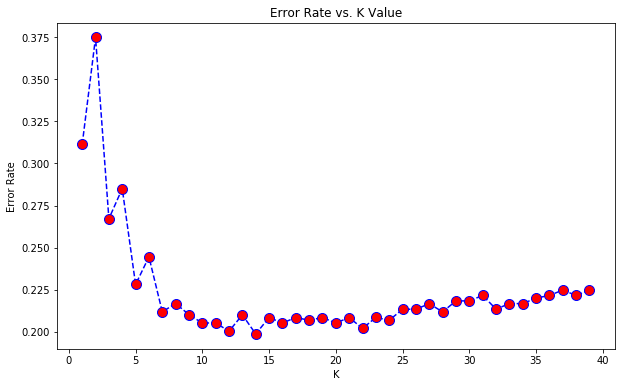

In [104]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [105]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')

WITH K=1


[[14 19]
 [12 78]]




In [108]:

knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=6')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')


WITH K=6


[[12 21]
 [ 1 89]]




In [109]:
knn.score(X_test,y_test)

0.8211382113821138

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('train_AV3 tec.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [4]:
df.bfill(axis = 0,inplace=True) 
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
from sklearn.preprocessing import LabelEncoder
Ib_make = LabelEncoder()
df=df.apply(LabelEncoder().fit_transform)

In [6]:
X=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
y=['Loan_Status']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop(['Loan_Status'], axis='columns')
y = df.Loan_Status
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state= 1)

In [10]:
from sklearn.svm import SVC
model = SVC()

In [11]:
model.fit(X_train, y_train)

C:\Users\Prasad\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [12]:
model.score(X_test, y_test)

0.7398373983739838

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train_AV3 tec.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.bfill(axis = 0,inplace=True) 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
df=df.apply(LabelEncoder().fit_transform)

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,81,8,1,2,1
1,1,1,1,1,0,0,306,60,81,8,1,0,0
2,2,1,1,0,0,1,139,0,26,8,1,2,1
3,3,1,1,0,1,0,90,160,73,8,1,2,1
4,4,1,0,0,0,0,381,0,94,8,1,2,1


In [6]:
inputs = df.drop('Loan_Status',axis='columns')
inputs

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,376,0,81,8,1,2
1,1,1,1,1,0,0,306,60,81,8,1,0
2,2,1,1,0,0,1,139,0,26,8,1,2
3,3,1,1,0,1,0,90,160,73,8,1,2
4,4,1,0,0,0,0,381,0,94,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,125,0,29,8,1,0
610,610,1,1,3,0,0,275,0,7,5,1,0
611,611,1,1,1,0,0,431,3,162,8,1,2
612,612,1,1,2,0,0,422,0,132,8,1,2


In [7]:
target = df['Loan_Status']
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [8]:
inputs

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,376,0,81,8,1,2
1,1,1,1,1,0,0,306,60,81,8,1,0
2,2,1,1,0,0,1,139,0,26,8,1,2
3,3,1,1,0,1,0,90,160,73,8,1,2
4,4,1,0,0,0,0,381,0,94,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,125,0,29,8,1,0
610,610,1,1,3,0,0,275,0,7,5,1,0
611,611,1,1,1,0,0,431,3,162,8,1,2
612,612,1,1,2,0,0,422,0,132,8,1,2


In [9]:
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [10]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,train_size=0.8,random_state= 1)

In [22]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy')

In [23]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [25]:
model.score(x_test,y_test)

0.7398373983739838

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
df=pd.read_csv('train_AV3 tec.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
df.bfill(axis = 0,inplace=True) 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
df=df.apply(LabelEncoder().fit_transform)

In [20]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']],df['Loan_Status'],train_size=0.9,random_state= 1)

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [32]:
model.fit(X_train, y_train)

C:\Users\Prasad\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,81,8,1,2,1
1,1,1,1,1,0,0,306,60,81,8,1,0,0


In [34]:
y_predicted = model.predict(X_test)

In [35]:
model.predict([[0,1,0,1,0,1,389,4,25,7,0,2]])

array([0])

In [36]:
X_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,454,1,0,0,0,1,412,0,39,8,1,1
52,52,0,0,0,0,0,286,0,65,8,1,1
536,536,1,1,0,0,0,390,236,183,8,1,2
469,469,1,1,0,0,0,293,170,63,8,1,2
55,55,1,1,2,0,0,104,33,50,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
365,365,1,0,0,1,0,391,0,86,8,1,0
8,8,1,1,2,0,0,269,63,119,8,1,2
194,194,1,0,0,0,0,283,0,73,8,1,0
122,122,0,0,0,0,0,46,281,90,8,0,1


In [37]:
model.predict_proba(X_test)

array([[0.22218891, 0.77781109],
       [0.24271411, 0.75728589],
       [0.25403582, 0.74596418],
       [0.13774164, 0.86225836],
       [0.15739144, 0.84260856],
       [0.88572744, 0.11427256],
       [0.14106851, 0.85893149],
       [0.42736943, 0.57263057],
       [0.87076271, 0.12923729],
       [0.1791428 , 0.8208572 ],
       [0.20389116, 0.79610884],
       [0.14568404, 0.85431596],
       [0.36565058, 0.63434942],
       [0.23309771, 0.76690229],
       [0.12927155, 0.87072845],
       [0.11196502, 0.88803498],
       [0.93789528, 0.06210472],
       [0.39552209, 0.60447791],
       [0.2015169 , 0.7984831 ],
       [0.86917867, 0.13082133],
       [0.7522119 , 0.2477881 ],
       [0.19600905, 0.80399095],
       [0.16198146, 0.83801854],
       [0.19696841, 0.80303159],
       [0.14858003, 0.85141997],
       [0.23468875, 0.76531125],
       [0.3547945 , 0.6452055 ],
       [0.23664973, 0.76335027],
       [0.76825517, 0.23174483],
       [0.79928317, 0.20071683],
       [0.

In [38]:
model.score(X_test,y_test)

0.8870967741935484